In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfTest = pd.read_csv("C:\\Users\\abhijit.a.pande\\Machine Learning\\Py_DS_ML_BC\\13-Logistic-Regression\\titanic_test.csv")

In [3]:
dfTrain = pd.read_csv("C:\\Users\\abhijit.a.pande\\Machine Learning\\Py_DS_ML_BC\\13-Logistic-Regression\\titanic_train.csv")

In [7]:
dfTrain.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


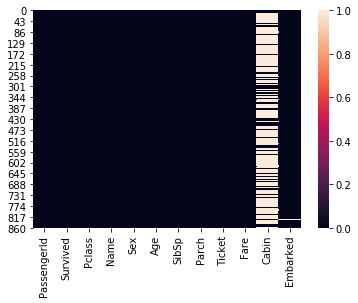

In [33]:
sb.heatmap(dfTrain.isnull())

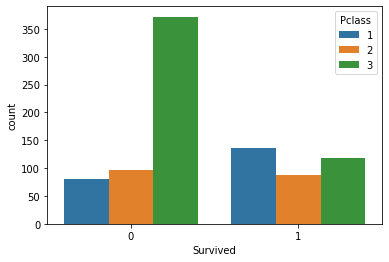

In [16]:
sb.countplot(x = 'Survived', data = dfTrain, hue = 'Pclass')

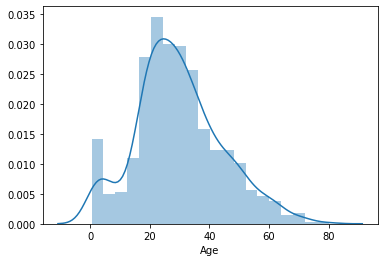

In [19]:
sb.distplot(dfTrain['Age'].dropna())

In [20]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


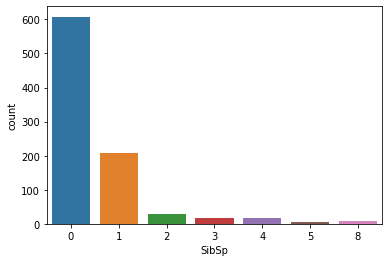

In [22]:
sb.countplot(x = 'SibSp', data = dfTrain)

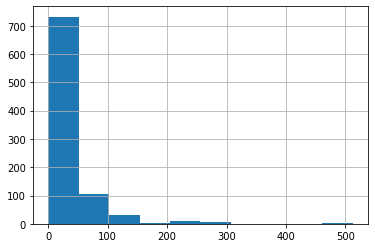

In [23]:
dfTrain['Fare'].hist()

In [24]:
import cufflinks as cf
cf.go_offline()
dfTrain['Fare'].iplot()

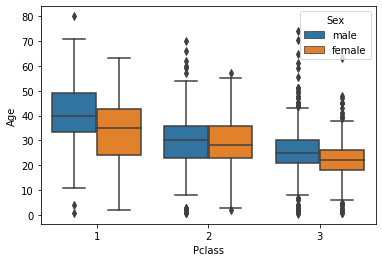

In [32]:
sb.boxplot(x = 'Pclass', y = 'Age', data = dfTrain, hue = "Sex")

In [29]:
def imputeage(cols):
    age = cols[0]
    Pclass = cols[1]
    sex = cols[2]
    if pd.isnull(age):
        if Pclass == 3 and sex == "female":
            return 22
        if Pclass == 3 and sex == "male":
            return 25
        if Pclass == 2 and sex == "female":
            return 28
        if Pclass == 2 and sex == "male":
            return 30
        if Pclass == 1 and sex == "female":
            return 35
        if Pclass == 1 and sex == "male":
            return 40
    else:
        return age

In [31]:
dfTrain['Age'] = dfTrain[['Age', 'Pclass', 'Sex']].apply(imputeage, axis = 1)

In [34]:
dfTrain.drop('Cabin',axis = 1, inplace = True)

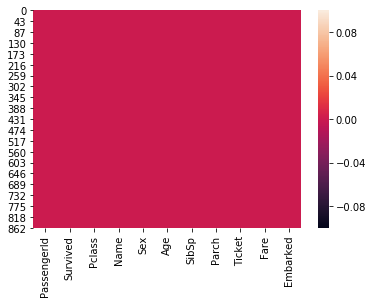

In [40]:
sb.heatmap (dfTrain.isnull())

In [39]:
dfTrain.dropna(inplace = True)

In [44]:
sex = pd.get_dummies(dfTrain['Sex'], drop_first = True)
embarked = pd.get_dummies(dfTrain['Embarked'], drop_first = True)

In [48]:
dfTrain = pd.concat([dfTrain,sex,embarked],axis = 1)

In [49]:
dfTrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [50]:
dfTrain.drop (['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [52]:
dfTrain.drop (['PassengerId'], axis = 1, inplace =True)

In [53]:
dfTrain

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,22.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [56]:
x = dfTrain.drop (['Survived'], axis = 1)
y = dfTrain['Survived']

In [57]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
lr = LogisticRegression()

In [63]:
lr.max_iter = 5000
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
predictions = lr.predict(x_test)

In [69]:
np.sum(predictions - y_test)

-9

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       160
           1       0.77      0.70      0.73       107

    accuracy                           0.79       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267

